# Исследование рынка общественного питания Москвы


## Цели и задачи проекта
**Цель:** Провести исследовательский анализ рынка общественного питания Москвы и помочь инвесторам в выборе подходящего места для открытия заведения общественного питания.


**Задачи:**
1. Загрузить данные датасетов и ознакомиться с их содержанием;
2. Провести предобработку данных;
3. Провести исследовательский анализ и ответить на вопросы:
    * Какие категории заведений представлены в данных, и сколько заведений в каждой категории?
    * Какие административные районы Москвы присутствуют в данных, и сколько заведений в каждом районе? Как распределены категории заведений в Центральном административном округе Москвы?
    * Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми?
    * Какое типичное количество посадочных мест в каждой категории заведений?
    * Как различаются средние рейтинги для разных типов заведений?
    * От чего сильнее всего зависит рейтинг заведения?
    * Какие заведения имеют больше всего сетевых точек и к каким категориям они относятся?
    * Как удалённость от центра влияет на цены в заведениях?
4. Сформулировать выводы по проведенному анализу и дать рекомендации.

## Описание данных
Нам предоставили данные с информацией о заведениях общественного питания Москвы, собранные на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Данные состоят из двух датасетов:
* `ctr_info.csv` - содержит информацию о заведениях общественного питания;
* `ctr_price.csv` - содержит информацию о среднем чеке в заведениях общественного питания.

#### Структура датасета `ctr_info.csv`
* `name` — название заведения;
* `address` — адрес заведения;
* `district` — административный район, в котором находится заведение, например Центральный административный округ;
* `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
* `hours` — информация о днях и часах работы;
* `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — `5.0`);
* `chain` — число, выраженное `0` или `1`, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
    * `0` — заведение не является сетевым;
    * `1` — заведение является сетевым.
* `seats` — количество посадочных мест.

#### Структура датасета `ctr_price.csv`

* `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
* `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
    * «Средний счёт: 1000–1500 ₽»;
    * «Цена чашки капучино: 130–220 ₽»;
    * «Цена бокала пива: 400–600 ₽».
    и так далее;
* `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»:
    * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    * Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
* `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:
    * Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
    * Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
    * Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

## Структура проекта

**ШАГ 1. Загрузка данных и знакомство с ними:**
1. Загрузить датасеты `ctr_info.csv` и `ctr_price.csv`;
2. Познакомиться с данными и изучить общую информацию о них: объем данных, соответствие данных описанию, наличие пропусков, соответствие типов данных и т.д.;
3. Сделать промежуточный вывод о полученных данных;
4. Объединить два датасета в один.

**ШАГ 2. Предобработка данных:**
1. Провести преобразование типов данных (при необходимости);
2. Изучить пропущенные значения в данных, предположить причины их появления и провести обработку;
3. Проанализировать данные на наличие явных и неявных дубликатов и провести нормализацию данных;
4. Создать столбец с признаком того, что заведение работает ежедневно и круглосуточно (24/7);
5. Сделать промежуточный вывод о проведённой работе.

**ШАГ 3. Исследовательский анализ данных:**
1. Исследовать количество объектов общественного питания по каждой категории заведения;
2. Исследовать распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы;
3. Исследовать соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения;
4. Исследовать количество посадочных мест в заведениях. Привести для каждой категории заведений наиболее типичное для него количество посадочных мест;
5. Исследовать рейтинг заведений;
6. Изучить, с какими категорийными параметрами рейтинги заведений показывает самую сильную корреляцию;
7. Определить топ-15 популярных сетевых заведений в Москве по количеству заведений в сети. Для каждого заведения посчитать средний рейтинг;
8. Изучить вариацию среднего чека заведения в зависимости от района Москвы;
9. Сделать промежуточный вывод о проведённой работе.

**ШАГ 4. Итоговый вывод и рекомендации:**
1. Сделать общий обзор проделанной работы;
2. Ответить на исследовательские вопросы или сделать обобщенный вывод;
3. Предложить рекомендации на основе проведенного исследования.

## 1. Загрузка данных и знакомство с ними

In [2]:
# Загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

# Отключаем сообщения с предупреждениями
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Загружаем датосеты
df_ctr_info = pd.read_csv('datasets/ctr_info.csv')
df_ctr_price = pd.read_csv('datasets/ctr_price.csv')

In [4]:
# Создаем функцию для обзора данных
def df_info(df):
    """
    Функция выводит обзорную информацию о датасете:
    - обзор первых 5 строк датасета;
    - общая информация;
    - количество пропусков в столбцах;
    
    Параметры:
    df - датафрейм с данными для анализа.
    """
    print('Обзор датасета \n')
    display(df.head(5))
    print('_____________________________________________________')
    print('\n Общая информация о датасете \n')    
    print(df.info())
    print('_____________________________________________________')
    print('\n Количество пропусков в столбцах \n')
    print(pd.DataFrame({'Count': df.isna().sum(), 'Percent': df.isna().mean() * 100}))
    print('_____________________________________________________')

In [5]:
# Выводим информацию о датасете 'df_ctr_info'
df_info(df_ctr_info)

Обзор датасета 



,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


_____________________________________________________

 Общая информация о датасете 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB
None
_____________________________________________________

 Количество пропусков в столбцах 

          Count    Percent
id            0   0.000000
name          0   0.000000
category      0   0.000000
address       0   0.000000
district      0   0.000000
hours       536   6.376398
rating        0   0.000000
chai

***Датасет `df_ctr_info` содержит 9 столбцов и 8406 строк. Информация в датасете соответствует описанию. Столбцы `hours` и `seats` содержат явные пропуски. Столбец `seats` представлен типом `float64`, но содержит целые числа и его можно перевести в тип `int64` заменив пропуски целочисленным индикатором. Типы данных столбцов `rating` и `chain` соответствуют своим значениям, но их можно оптимизировать, понизив размерность. Названия столбцов представлены в едином стиле.***

In [6]:
# Выводим информацио о датасете 'df_ctr_price'
df_info(df_ctr_price)

Обзор датасета 



,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


_____________________________________________________

 Общая информация о датасете 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB
None
_____________________________________________________

 Количество пропусков в столбцах 

                   Count    Percent
id                     0   0.000000
price                743  18.309512
avg_bill             242   5.963529
middle_avg_bill      909  22.400197
middle_coffee_cup   3523  86.816166
_____________________________________________________


***Датасет `df_ctr_price` содержит 5 столбцов и 4058 строк. Информация в датасете соответствует описанию. Все столбцы, кроме `id` содержат явные пропуски. Типы данных соответствуют значениям в столбцах. Названия столбцов представлены в едином стиле.***

In [7]:
# Объединим два датасета в один
df = df_ctr_info.merge(df_ctr_price, on='id', how='left')

In [8]:
# Проверяем, все ли строки вошли в итоговый датафрейм
print('Количество строк, вошедших в итоговый датафрейм:\n')
print(f"- из исходного датафрейма ctr_info.csv: {df[df['id'].isin(df_ctr_info['id'])].shape[0]}")
print(f"- из исходного датафрейма ctr_price.csv: {df[df['id'].isin(df_ctr_price['id'])].shape[0]}")

Количество строк, вошедших в итоговый датафрейм:

- из исходного датафрейма ctr_info.csv: 8406
- из исходного датафрейма ctr_price.csv: 4058


***Все данные из датасетов `ctr_info.csv` и `ctr_price.csv` вошли в итоговый датасет***

## 2. Предобработка данных

### 2.1. Оптимизируем типы данных

In [9]:
# Оптимизируем размерность столбцов `rating` и `chain`
df['rating'] = pd.to_numeric(df['rating'], downcast='float')
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')

In [10]:
# Проверяем результат
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float32
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float32(1), float64(3), int8(1), object(8)
memory usage: 829.1+ KB


### 2.2. Проверяем наличие пропусков в данных и обрабатываем их

In [11]:
# Выводим количество и долю пропусков в датасете
print(pd.DataFrame({'Count': df.isna().sum(), 'Percent': df.isna().mean() * 100}))

                   Count    Percent
id                     0   0.000000
name                   0   0.000000
category               0   0.000000
address                0   0.000000
district               0   0.000000
hours                536   6.376398
rating                 0   0.000000
chain                  0   0.000000
seats               3611  42.957411
price               5091  60.563883
avg_bill            4590  54.603854
middle_avg_bill     5257  62.538663
middle_coffee_cup   7871  93.635498


**Проверим, в каких заведениях чаще встречаются пропуски в столбце `hours`. Добавим столбец `is_hours` с булевыми значениями, где `0` - есть запись, `1` - пропуск.**

In [12]:
# Напишем функцию проверки
def create_is_na(x):
    """
    Функция создаёт новый столбец с бинарным признаком, который указывает
    на наличие данных в столбце. Функция применяется к столбцу после метода isna()
    """
    return 0 if x else 1

In [13]:
# Вызываем функцию create_is_na и добавляем булевый столбец
df['is_hours'] = df['hours'].isna().apply(create_is_na)

In [14]:
# Проверяем корретность нового столбца
display(df.loc[df['hours'].isna(), ['hours', 'is_hours']].head(5))
display(df.loc[df['hours'].notna(), ['hours', 'is_hours']].head(5))

,hours,is_hours
38,NaN,0
40,NaN,0
44,NaN,0
56,NaN,0
108,NaN,0


,hours,is_hours
0,"ежедневно, 10:00–22:00",1
1,"ежедневно, 10:00–22:00",1
2,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",1
3,"ежедневно, 09:00–22:00",1
4,"ежедневно, 10:00–22:00",1


**Посмотрим, как зависит наличие пропусков в столбце `hours` от размера заведения и отдаленности от центра.**

In [15]:
# Пишем вспомогательную функцию 
def relations(x):
    """
    Функция позволяет определить зависимости наличия пропусков в столбце с категорийными столбцами датасета. 
    Функция создает сводную таблицу на основе булевого столбца, который передается в функцию, и категорийных столбцов.
    """
    for col in ('district', 'chain'):
        pivot_category = pd.pivot_table(df,
                                index=col,
                                columns=x,
                                values='id',
                                aggfunc='count',
                                )
        print(pivot_category)
        print('\n_________________\n')

In [16]:
# Строим таблицы зависимости
relations(df['is_hours'])

is_hours                                  0     1
district                                         
Восточный административный округ         75   723
Западный административный округ          66   785
Северный административный округ          54   846
Северо-Восточный административный округ  61   830
Северо-Западный административный округ   40   369
Центральный административный округ       31  2211
Юго-Восточный административный округ     85   629
Юго-Западный административный округ      59   650
Южный административный округ             65   827

_________________

is_hours    0     1
chain              
0         420  4781
1         116  3089

_________________



***В 6 столбцах из 13 содержаться пропуски:***
* ***Столбец `hours` - 536 пропусков (6%): тут мы видим, что пропуски в основном встречаются в отдаленных от центра заведениях или не имеющих сети. В таких заведениях пропуски допустимы, но т.к. их доля незначительная, можно удалить.***
* ***Столбец `seats` - 3611 пропусков (43%): удаление пропусков может исказить анализ, а заполнить пропущенные значения нечем, поэтому оставим их.***
* ***Столбцы `price` и `avg_bill` содержат 5091 (60%) и 4590 (55%) пропусков соответственно: по все видимости не все заведения делятся информацией о своих ценах, поэтому такое большое количество пропусков. Заполнить пропуски нечем, поэтому оставляем их.***   
* ***В столбцах `middle_avg_bill` и `middle_coffee_cup` более 60% пропусков, но т.к. столбцы содержат расчетные значения цен для определенных категорий, пропуски в столбцах допустимы, оставим их.***

In [17]:
# Удаляем строки с пропусками в столбце `hours`
df = df.dropna(subset=['hours'])

***Удалили 536 строк с пропусками в столбце `hours`, а остальные пропуски оставили из-за большого объема данных, потеря которых может быть критична.***

### 2.3. Проверяем данные на явные и неявные дубликаты

In [18]:
# Проверим количество явных дубликатов по всему датафрейму
df.duplicated().sum()

0

In [19]:
# Проверим количество неявных дубликатов по названию заведения и его адресу
df.duplicated(subset=['name', 'address']).sum()

0

In [20]:
# Проверяем уникальные значения в категориальных столбцах
for column in ['category', 'district', 'price', 'chain']:
    print(f'Уникальные значения в столбце {column}:')
    print(df[column].sort_values().unique())
    print()

Уникальные значения в столбце category:
['бар,паб' 'булочная' 'быстрое питание' 'кафе' 'кофейня' 'пиццерия'
 'ресторан' 'столовая']

Уникальные значения в столбце district:
['Восточный административный округ' 'Западный административный округ'
 'Северный административный округ'
 'Северо-Восточный административный округ'
 'Северо-Западный административный округ'
 'Центральный административный округ'
 'Юго-Восточный административный округ'
 'Юго-Западный административный округ' 'Южный административный округ']

Уникальные значения в столбце price:
['высокие' 'выше среднего' 'низкие' 'средние' nan]

Уникальные значения в столбце chain:
[0 1]



***При первом рассмотрении явных и неявных дубликатов не обнаружено.***

**Проведем нормализацию данных в столбцах с названием и адресом заведения и проверим еще раз.**

In [21]:
# Приведем к нижнему регистру названия заведений и адреса и если есть, удалим лишние пробелы.
df['name'] = df['name'].str.lower().str.strip()
df['address'] = df['address'].str.lower().str.strip()

In [22]:
# Выведем названия самых часто встречающихся заведений
df['name'].value_counts().sort_values(ascending=False).head(20)

шоколадница                            120
кафе                                   101
домино'с пицца                          77
додо пицца                              74
one price coffee                        72
яндекс лавка                            68
cofix                                   65
prime                                   50
кофепорт                                42
кулинарная лавка братьев караваевых     39
хинкальная                              39
теремок                                 38
шаурма                                  33
cofefest                                32
буханка                                 31
чайхана                                 29
му-му                                   27
столовая                                25
drive café                              24
кофемания                               23
Name: name, dtype: int64

In [23]:
# Посмотрим в какие категрии входят заведения с названием "кафе"
df.loc[df['name'] == 'кафе', 'category'].value_counts().sort_values(ascending=False)

кафе               79
кофейня             6
столовая            6
ресторан            6
быстрое питание     4
Name: category, dtype: int64

***Среди общепитов есть заведение с названием `кафе` и большая часть относится к одноименной категории, но не все, поэтому нельзя однозначно сказать, что для этих заведений ошибочно указана категория вместо названия.*** 

In [24]:
# Проверим, являются ли эти заведения сетевыми
df.loc[(df['name'] == 'кафе') & (df['chain'] == 1)].shape[0]

0

***Учитывая, что ни одно заведение с названием кафе не является сетевым, можно предположить, что это не связанные между собой небольшие заведения. Избавляться от них не будем, но эту особенность нужно учитывать при дальнейшем анализе***

In [25]:
# Повторно проверим количество дубликатов по названию заведения и его адресу
df.duplicated(subset=['name', 'address']).sum()

3

In [26]:
# Удаляем дубликаты
df = df.drop_duplicates(subset=['name', 'address'])

***Провели нормализацию данных после чего обнаружилось 3 дубликата, которые мы удалили***

**В столбце с категориями заведений присутствует категория - `бар,паб`. Для лучшего восприятия заменим его на `бар`**

In [27]:
# Выводим данные до изменений
df['category'].value_counts().sort_values(ascending=False)

кафе               2002
ресторан           1968
кофейня            1398
бар,паб             746
пиццерия            628
быстрое питание     570
столовая            306
булочная            249
Name: category, dtype: int64

In [28]:
# Заменяем значения 'бар,паб' на 'бар'
df['category'] = df['category'].str.replace('бар,паб', 'бар')

In [29]:
# Проверяем результат
df['category'].value_counts().sort_values(ascending=False)

кафе               2002
ресторан           1968
кофейня            1398
бар                 746
пиццерия            628
быстрое питание     570
столовая            306
булочная            249
Name: category, dtype: int64

**Названия административных округов Москвы представлены полными наименованиями, что не очень удобно при построении визуализаций. Сократим названия до аббревиатур: `ЦАО`, `САО`, `СВАО` и т.д.**

In [30]:
# Выводим данные до изменений
df['district'].value_counts().sort_values(ascending=False)

Центральный административный округ         2211
Северный административный округ             844
Северо-Восточный административный округ     829
Южный административный округ                827
Западный административный округ             785
Восточный административный округ            723
Юго-Западный административный округ         650
Юго-Восточный административный округ        629
Северо-Западный административный округ      369
Name: district, dtype: int64

In [31]:
# Заменяем названия административных округов на их аббревиатуры
replace_values = {'Центральный административный округ': 'ЦАО',
                  'Северный административный округ':'САО',
                  'Северо-Восточный административный округ':'СВАО',
                  'Южный административный округ':'ЮАО',
                  'Западный административный округ':'ЗАО',
                  'Восточный административный округ':'ВАО',
                  'Юго-Западный административный округ':'ЮЗАО',
                  'Юго-Восточный административный округ':'ЮВАО',
                  'Северо-Западный административный округ':'СЗАО'
}
df['district'] = df['district'].replace(replace_values)

In [32]:
# Проверяем результат
df['district'].value_counts().sort_values(ascending=False)

ЦАО     2211
САО      844
СВАО     829
ЮАО      827
ЗАО      785
ВАО      723
ЮЗАО     650
ЮВАО     629
СЗАО     369
Name: district, dtype: int64

**Добавим новый столбец, который будет показывать, является ли заведение круглосуточным или нет.**

In [33]:
# Добавляем булевый столбец
df['is_24_7'] = (
    df['hours'].str.contains('ежедневно', case=False)
    & df['hours'].str.contains('круглосуточно', case=False)
    ).astype(int)

***Вывод по результатам предобработки данных:***
* ***привели столбцы `rating` и `chain` к более оптимальному типу данных/***
* ***изучили пропуски и удалили 536 строк с пропусками в столбце `hours`, а остальные пропуски было решено оставить.*** 
* ***нормализовали данные и избавились от трех дубликатов.***
* ***скорректировали наименование категрии `бар,паб` на `бар`.***
* ***оптимизировали наименования административных округов до их аббревиатур.***
* ***добавили новый столбец is_24_7 для дальнейшей аналитики.***

## 3. Исследовательский анализ данных

### 3.1. Какие категории заведений представлены в данных?

In [34]:
# Выводим перечень уникальных категорий
df['category'].sort_values().unique()

array(['бар', 'булочная', 'быстрое питание', 'кафе', 'кофейня',
       'пиццерия', 'ресторан', 'столовая'], dtype=object)

In [35]:
# Выводим количество заведений в разрезе каждой категории
df['category'].value_counts()

кафе               2002
ресторан           1968
кофейня            1398
бар                 746
пиццерия            628
быстрое питание     570
столовая            306
булочная            249
Name: category, dtype: int64

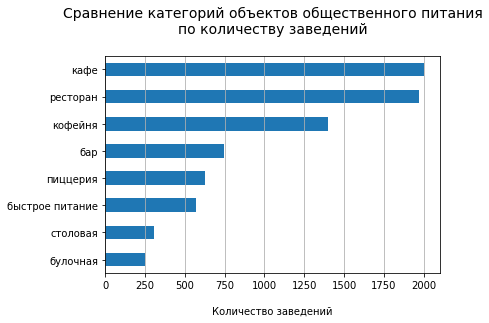

In [76]:
# Построим линейчатую диаграмму распределения категорий по количеству заведений 
df['category'].value_counts().sort_values().plot(
        kind='barh',
        figsize=(6,4)
    )
plt.title('Сравнение категорий объектов общественного питания\nпо количеству заведений\n', fontsize=14)
plt.xlabel('\nКоличество заведений')
plt.grid(axis='x')

plt.show()

***В данных представлено 8 категорий заведений общественного питания: бар/паб, булочная, быстрое питание, кафе, кофейня, пиццерия, ресторан и столовая. На диаграмме видим, что в Москве большую долю заведений общепита берут на себя кафе и рестораны (2002 и 1968 заведений соответственно), а столовых и булочных меньше всего. Москва — крупный деловой и туристический центр, где востребованы места для встреч и неформального общения. Кафе и рестораны лучше подходят для этих целей. Столовые же ассоциируются с советской эпохой и воспринимаются как устаревший формат, а булочные не всегда соответствуют запросу на комплексное питание.***

### 3.2. Какие административные районы Москвы присутствуют в данных?

In [37]:
# Выводим перечень районов Москвы с количеством заведений
df['district'].value_counts()

ЦАО     2211
САО      844
СВАО     829
ЮАО      827
ЗАО      785
ВАО      723
ЮЗАО     650
ЮВАО     629
СЗАО     369
Name: district, dtype: int64

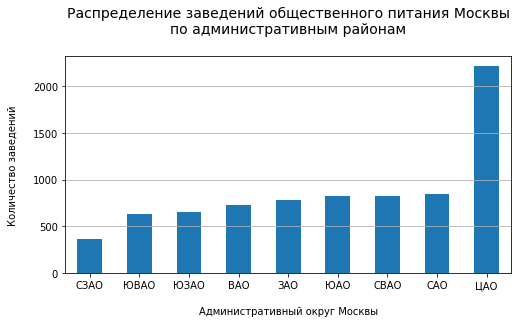

In [75]:
# Построим линейчатую диаграмму распределения заведений Москвы по административным округам:
df['district'].value_counts().sort_values().plot(
        kind='bar',
        figsize=(8,4)
    )
plt.title('Распределение заведений общественного питания Москвы\nпо административным районам\n', fontsize=14)
plt.ylabel('Количество заведений\n')
plt.xlabel('\nАдминистративный округ Москвы')
plt.grid(axis='y')
plt.xticks(rotation=0)

plt.show()

In [39]:
# Выведем отдельно количество заведений ЦАО в разрезе категорий заведений
df[df['district'] == 'ЦАО'].groupby('category')['id'].count().sort_values(ascending=False)

category
ресторан           665
кафе               444
кофейня            426
бар                364
пиццерия           112
быстрое питание     85
столовая            65
булочная            50
Name: id, dtype: int64

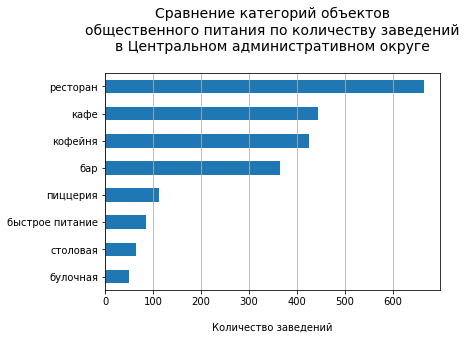

In [80]:
# Построим линейчатую диаграмму распределения заведений каждой категории в ЦАО
df[df['district'] == 'ЦАО'].groupby('category')['id'].count().sort_values().plot(
        kind='barh',
        figsize=(6,4)
)
plt.title('Сравнение категорий объектов\nобщественного питания по количеству заведений\nв Центральном административном округе\n', fontsize=14)
plt.xlabel('\nКоличество заведений')
plt.ylabel('')
plt.grid(axis='x')

plt.show()

***Большая часть заведений общественного питания размещена в Центральном административном округе - 2211 заведение, несмотря на то, что этот округ по площади меньше остальных. Это связано с тем, что ЦАО - исторический и деловой цент Москвы, где сосредоточены главные туристические объекты, бизнес-центры, культурные учреждения и транспортные узлы, что создаёт устойчивый спрос на общепит. Меньше всего заведений в Северо-западном административном округе - 369 заведений, т.к. там преобладают промышленные зоны и практически нет мест привлечения туристов, а также этот район, помимо ЦОА, меньше остальных по площади и населению.***

***Из всех категорий в Центральном округе преобладают рестораны - 665 заведений. Связано это с тем, что историческая застройка и престижность локаций ЦОА рождают спрос на более дорогой формат заведений с высоким уровнем сервиса и разнообразной кухней, в отличии от фастфуда, столовых или булочных, которые занимают наименьшую долю присутствия в центральном районе.***

### 3.3. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? 

In [41]:
# Выведем соотношение сетевых и несетевых заведений Москвы
df['chain'].value_counts(normalize=True)

0    0.607601
1    0.392399
Name: chain, dtype: float64

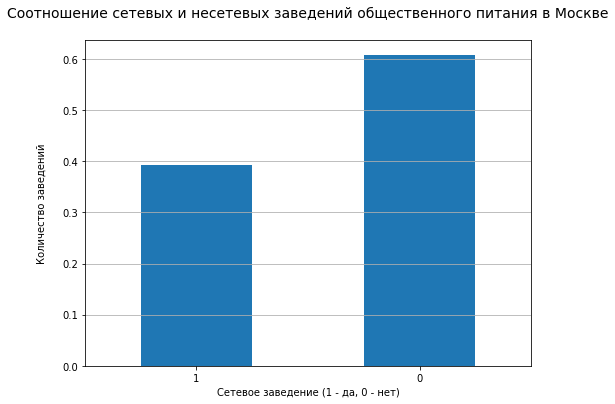

In [81]:
# Построим визуализацию соотношений сетевых и несетевых заведений
df['chain'].value_counts(normalize=True).sort_values().plot(kind='bar',
                                                            figsize=(8,6)
)
plt.title('Cоотношение сетевых и несетевых заведений общественного питания в Москве\n', fontsize=14)
plt.ylabel('Количество заведений\n')
plt.xlabel('Сетевое заведение (1 - да, 0 - нет)')
plt.xticks(rotation=0)
plt.grid(axis='y')

plt.show()

***Доля сетевых заведений в Москве составляет 39%***

In [43]:
# Выведем соотношение сетевых и несетевых заведений Москвы для каждой категории заведения
df_group = df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value=0)
df_group

chain,0,1
category,,
бар,0.788204,0.211796
булочная,0.381526,0.618474
быстрое питание,0.607018,0.392982
кафе,0.644855,0.355145
кофейня,0.489270,0.510730
пиццерия,0.474522,0.525478
ресторан,0.638720,0.361280
столовая,0.722222,0.277778


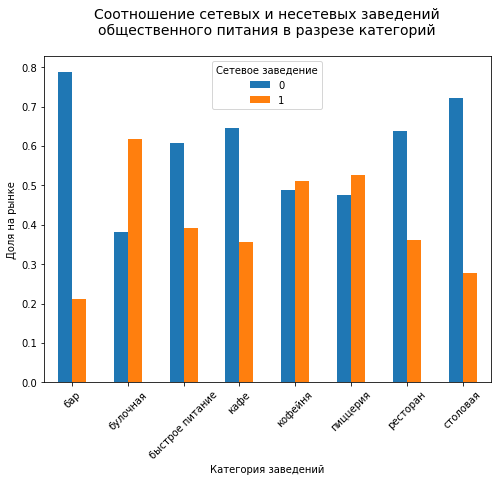

In [84]:
# Построим столбчатую диаграмму для визуализации соотношения
df_group.plot(kind='bar',
              figsize=(8,6),
              rot=45
             )
plt.title('Соотношение сетевых и несетевых заведений\nобщественного питания в разрезе категорий\n', fontsize=14)
plt.ylabel('Доля на рынке')
plt.xlabel('Категория заведений')
plt.legend(title='Сетевое заведение')

plt.show()

***В целом по Москве доля несетевых заведений выше, чем сетевых, и составляет 61%. Несетевые заведения, как правило, требуют меньше ресурсов для открытия и часто создаются для удовлетворения локального спроса. Сетевые заведения требуют значительных инвестиций, стандартизации и масштабируемости, что ограничивает их количество.***


***Но есть отдельные категории заведений, где доля сетевых преобладает над несетевыми: Булочные - доля сетевых заведений 62%, Пиццерии - доля сетевых заведений 53%, Кофейни - доля сетевых заведений 51%. Такие заведения часто работают по франшизе или стандартизированным моделям и рецептам, что упрощает масштабирование и поддержание единого качества.***


***Для таких заведений как бары, пабы, столовые, кафе и рестораны типичен несетевой формат. У них доля сетевых заведений ниже 37%.***

### 3.4. Какое типичное количество посадочных мест в каждой категории заведений?

In [45]:
# Выводим информацию по базовым статистикам для столбца с количеством посадочных мест
df['seats'].describe()

count    4493.000000
mean      107.818607
std       119.221227
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

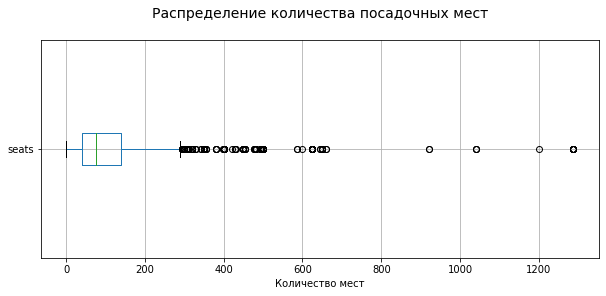

In [85]:
# Построим диаграмму размаха для количества посадочных мест
plt.figure(figsize=(10,4))

df.boxplot(column=['seats'], vert=False)

plt.title('Распределение количества посадочных мест\n', fontsize=14)
plt.xlabel('Количество мест')
plt.show()

***В столбце с количеством посадочных мест есть нулевые значения, выбросы, а также аномально высокие значения. Нулевые значения допустимы, т.к. есть заведения без посадочных мест с обслуживанием только "на вынос" или с доставкой. Аномально высокие значения могут быть ошибками в данных, но также нельзя исключать и наличие заведений, которые предоставляют услуги проведения банкетов и корпоративных мероприятий, чем обосновано большое количество посадочных мест.***

In [47]:
# Выводим информацию о количестве аномальных значений в столбцах
print(f"Количество аномально высоких значений: {df[df['seats'] >= 800].shape[0]}")

Количество аномально высоких значений: 14


**Создадим срез без пропусков и аномальных значений.**  

In [48]:
# Создаем срез датафрейма откуда убираем пропуски, нулевые и аномальные значения
df_slice = df[(df['seats'] < 800) & (df['seats'].notna())]

In [49]:
# Посчитаем средние и медианные значения посадочных мест для каждой категории
df_slice.groupby('category')['seats'].agg(['mean', 'median']).reset_index().round(2)

,category,mean,median
0,бар,115.43,81.0
1,булочная,90.05,50.0
2,быстрое питание,97.54,69.0
3,кафе,92.31,60.0
4,кофейня,107.24,80.0
5,пиццерия,91.79,53.5
6,ресторан,118.52,86.0
7,столовая,92.73,72.0


***Из-за наличия выбросов среднее количество и медиана сильно отличаются, поэтому при дальнейшем анализе будем использовать именно медианное значение количества посадочных мест.*** 

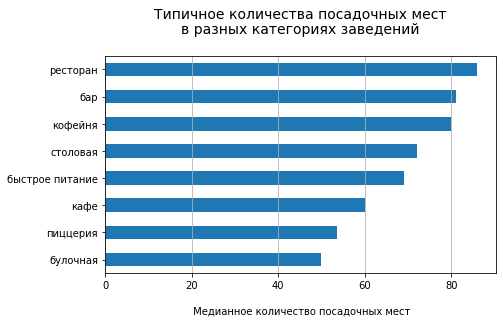

In [86]:
# Построим диаграмму 
df_slice.groupby('category')['seats'].median().sort_values().plot(kind='barh',
                                                                  figsize=(7,4)
)
plt.title('Типичное количества посадочных мест\nв разных категориях заведений\n', fontsize=14)
plt.xlabel('\n Медианное количество посадочных мест')
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(axis='x')

plt.show()

***Рестораны и бары являются лидерами по количеству посадочных мест, а вот пиццерии, наоборот, имеют посадочных мест меньше, т.к. часто работают на доставку.***

### 3.5. Как различаются рейтинги для разных типов заведений?

In [51]:
# Выведем статистику по рейтингам заведений
df['rating'].describe()

count    7867.000000
mean        4.244328
std         0.452896
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

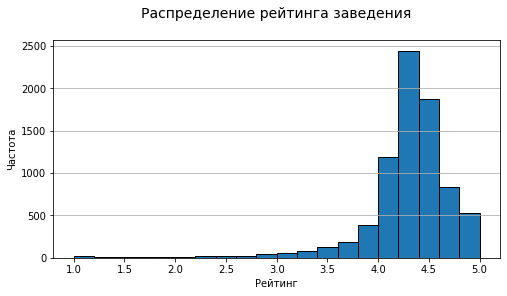

In [87]:
# Построим гистограмму распределения рейтингов заведений
df['rating'].plot(
                kind='hist',
                bins=20,
                edgecolor='black',
                figsize=(8,4)
    
)
plt.title('Распределение рейтинга заведения\n', fontsize=14)
plt.xlabel('Рейтинг')
plt.ylabel('Частота')
plt.grid(axis='y')

plt.show()

***Распределение рейтинга сильно скошено вправо. Средний рейтинг составляет 4,24. Это говорит о том, что посетители склонны чаще ставить положительные оценки в среднем от 4 до 4,5.***

In [53]:
# Посчитаем средний рейтинг для всех категорий заведений
df.groupby('category')['rating'].mean().sort_values(ascending=False).round(2)

category
бар                4.39
пиццерия           4.30
ресторан           4.30
булочная           4.28
кофейня            4.28
столовая           4.22
кафе               4.15
быстрое питание    4.06
Name: rating, dtype: float32

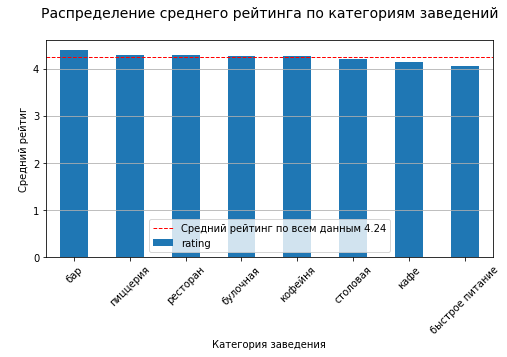

In [88]:
# Построим диаграмму со средним рейтингом заведений для каждой категории
df_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)
df_rating.plot(kind='bar',
               figsize=(8,4)
              )

# Добавим на график линию среднего рейтинга по всем данным
mean_rating = df['rating'].mean()
plt.axhline(mean_rating,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f'Средний рейтинг по всем данным {round(mean_rating,2)}'
)

plt.title('Распределение среднего рейтинга по категориям заведений\n', fontsize=14)
plt.ylabel('\nСредний рейтиг')
plt.xlabel('Категория заведения')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()

plt.show()

***Средний рейтинг заведения между категорий различается не сильно и распределен от 4,06 до 4,39. Бары как правило имеют рейтинг выше остальных категорий, а вот заведения быстрого питания оцениваются ниже. Бары чаще всего являются авторскими несетевыми заведениями со своей атмосферой и антуражем, что оставляет у посетителей положительное впечатление. Фастфуды в свою очередь более стандартизированы и направлены на доступность и скорость обслуживания, отчего страдает качество сервиса.***

### 3.6. C какими данными рейтинги заведений показывают самую сильную корреляцию?

In [55]:
# Вычисляем корреляционную матрицу с использованием phi_k
crl_matrix = df[['category', 'district', 'rating', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix()
crl_matrix.loc[crl_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['rating', 'chain', 'seats', 'is_24_7']


,rating
price,0.262767
category,0.190219
is_24_7,0.185933
district,0.185467
chain,0.121311
seats,0.000000


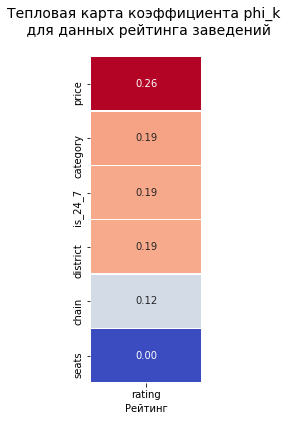

In [90]:
# Выводим корреляцию рейтинга с другими параметрами в виде тепловой карты
plt.figure(figsize=(2, 6))

data_heatmap = crl_matrix.loc[crl_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            linewidths=0.5,
            cbar=False
           )

plt.title('Тепловая карта коэффициента phi_k \n для данных рейтинга заведений\n', fontsize=14)
plt.xlabel('Рейтинг')

plt.show()

***Связь рейтинга заведений с другими параметрами слабая положительная, влияние рассматриваемых параметров минимальное. Тем не менее видим, что рейтинг выше других коррелирует с категорией цены в заведении. Проанализируем подробней взаимосвязь между этими параметрами.*** 

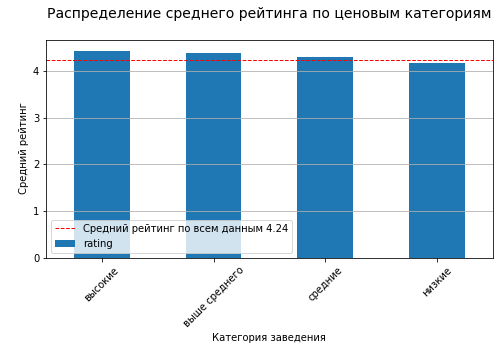

In [91]:
# Построим диаграмму со средним рейтингом заведений для ценовых категорий
df_group_price = df.groupby('price')['rating'].mean().sort_values(ascending=False)
df_group_price.plot(kind='bar',
               figsize=(8,4)
              )

# Добавим на график линию среднего рейтинга по всем данным
mean_rating = df['rating'].mean()
plt.axhline(mean_rating,
            color='red',
            linestyle='--',
            linewidth=1,
            label=f'Средний рейтинг по всем данным {round(mean_rating,2)}'
)

plt.title('Распределение среднего рейтинга по ценовым категориям\n', fontsize=14)
plt.ylabel('\n Средний рейтинг')
plt.xlabel('Категория заведения')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()

plt.show()

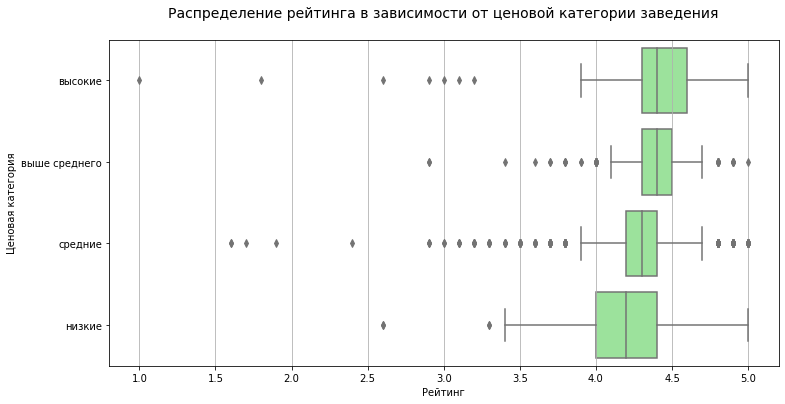

In [92]:
# Построим диаграммы размаха рейтинга для каждой ценовой категории
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='rating', y='price', order = df_group_price.index, color='lightgreen')

plt.title('Распределение рейтинга в зависимости от ценовой категории заведения\n', fontsize=14)
plt.xlabel('Рейтинг')
plt.ylabel('Ценовая категория')
plt.grid(axis='x')

plt.show()

***На диаграмах видим положительную взаимосвязь - чем выше у заведения ценовая категория, тем выше оценка посетителей. Дорогие заведения предлагают лучший сервис, эксклюзивность и соответствуют завышенным ожиданиям платежеспособной аудитории, которая склонна ставить более высокие оценки.***

### 3.7. Какие заведения имеют самую большую сеть?

In [59]:
# Посчитаем количество точек в сети для каждого сетевого заведения и оставим 15 самых крупных.
df_top15 = df.loc[df['chain'] == 1].groupby('name').agg({'id': 'count', 'rating': 'mean'}).round(2)
df_top15 = df_top15.sort_values(by='id', ascending=False).head(15)
df_top15 = df_top15.reset_index().rename(columns={'id': 'count_points', 'rating': 'mean_rating'})
df_top15

,name,count_points,mean_rating
0,шоколадница,120,4.18
1,домино'с пицца,76,4.17
2,додо пицца,74,4.29
3,one price coffee,71,4.06
4,яндекс лавка,68,3.87
5,cofix,65,4.08
6,prime,50,4.12
7,кофепорт,42,4.15
8,кулинарная лавка братьев караваевых,39,4.39
9,хинкальная,39,4.37


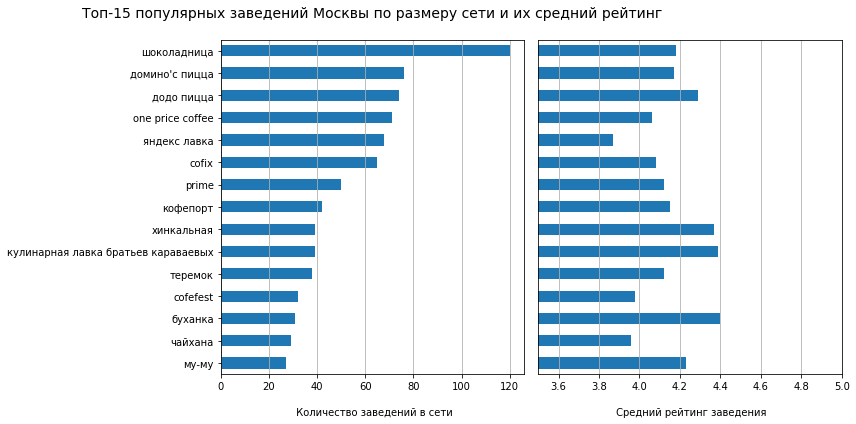

In [96]:
# Построим диаграмму с Топ-15 сетевых заведений Москвы и их средним рейтингом
# Для удобства сравнения построим две отдельных диаграммы рядом
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Первый график
df_top15.sort_values(by='count_points').plot.barh(x='name', y='count_points', ax=ax1, legend=False)
ax1.set_title('Топ-15 популярных заведений Москвы по размеру сети и их средний рейтинг\n', fontsize=14)
ax1.set_ylabel('')
ax1.set_xlabel('\n Количество заведений в сети')
ax1.grid(axis='x')

# Второй график
df_top15.sort_values(by='count_points').plot.barh(y='mean_rating', ax=ax2, legend=False)
ax2.set_xlim(left=3.5, right=5)
ax2.set_yticks([])
ax2.set_xlabel('\n Средний рейтинг заведения')
ax2.grid(axis='x')

plt.tight_layout()
plt.show()

***«Шоколадница» лидирует по количеству точек (120), что значительно превышает остальных участников Топ-15. За ней следуют «Домино'с Пицца» (76 точек) и «Додо Пицца» (74 точки), что подчеркивает популярность пиццерий в Москве. Кофейни также представлены в числе лидеров: «One Price Coffee» (71 точка) и «Cofix» (65 точек).***

In [61]:
# Определим, к каким категориям относятся популярные заведения Москвы
df_top15_category = df[(df['name'].isin(df_top15['name'])) & (df['chain'] == 1)]
df_top15_category = df_top15_category.groupby('category')['id'].count()

In [62]:
df_top15_category

category
бар                  4
булочная            24
быстрое питание     10
кафе                90
кофейня            336
пиццерия           151
ресторан           184
столовая             2
Name: id, dtype: int64

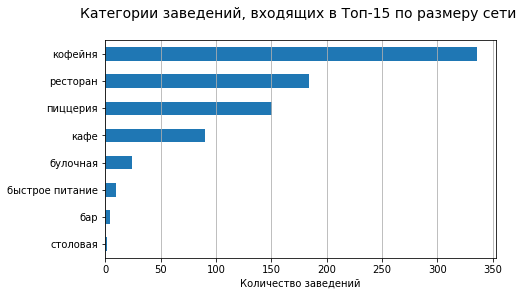

In [97]:
# Построим диаграмму сравнения, показывающую к каким категориям относятся популярные заведения 
plt.figure(figsize=(7, 4))
df_top15_category.sort_values().plot(kind='barh')

plt.title('Категории заведений, входящих в Топ-15 по размеру сети \n', fontsize=14)
plt.xlabel('Количество заведений')
plt.ylabel('')
plt.grid(axis='x')

plt.show()

***Большая часть популярных заведений - кофейни, рестораны и пиццерии, что отражает ежедневный спрос москвичей на быстрое и удобное питание по утрам и в дневное время, а также на более качественное питание и формальную обстановку во время бизнес-ланчей и в вечернее время.***

***Заведения с меньшим количеством точек, но высоким рейтингом (например, «Буханка», «Кулинарная лавка братьев Караваевых») могут делать ставку на качество и уникальность предложения.***

***Для заведений с низким рейтингом («Яндекс Лавка», «Чайхана») рекомендуется провести анализ причин неудовлетворенности клиентов и улучшить сервис или продукцию***

### 3.8. Как удалённость от центра влияет на цены в заведениях?

In [64]:
# Выведем статистики по среднему чеку заведений
df['middle_avg_bill'].describe()


count     3143.000000
mean       957.886096
std       1010.508023
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

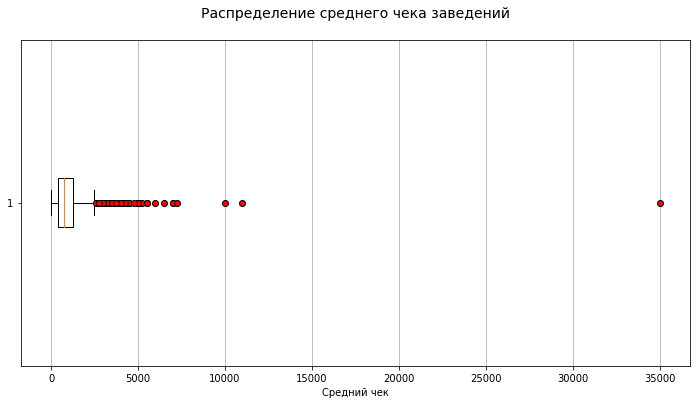

In [98]:
# Построим диаграмму размаха среднего чека заведений
plt.figure(figsize=(12, 6))

plt.boxplot(df['middle_avg_bill'].dropna(),
            vert=False,
            flierprops=dict(markerfacecolor='r', marker='o')
)
plt.title('Распределение среднего чека заведений\n', fontsize=14)
plt.xlabel('Средний чек')
plt.grid(axis='x')

plt.show()

***В данных о средним чеке заведений присутствуют нулевые и также аномально высокие значения. Можем предположить, что нулевые значения могут быть метками-индикаторами, которые означают отсутствие информации, а аномально высокие значения могут быть ошибками в данных.***

**Отфильтруем пропуски, нулевые значения, а также аномально высокие значения от 10000 и выше.**

In [66]:
df[(df['middle_avg_bill'] == 0) | (df['middle_avg_bill'] >= 10000)].shape[0]

4

***Нулевых и аномальных значений всего 4***

In [67]:
# Отфильтруем датасет
df_avg_price = df[(df['middle_avg_bill'] != 0) & (df['middle_avg_bill'] < 10000) & (df['middle_avg_bill'].notna())]

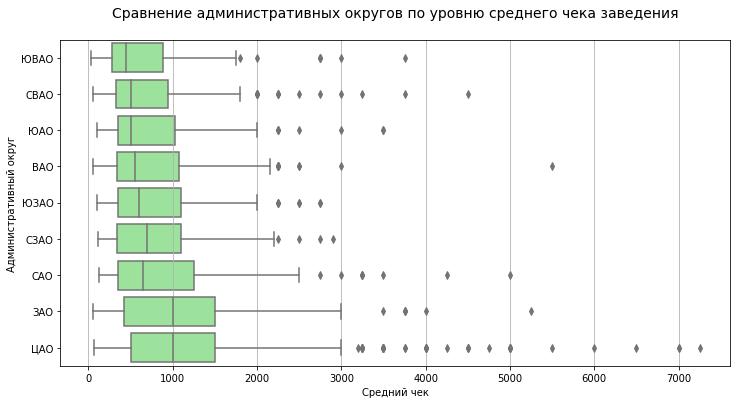

In [99]:
# Построим диаграммы размаха цен для каждого округа Москвы
plt.figure(figsize=(12, 6))

order = df_avg_price.groupby('district')['middle_avg_bill'].mean().sort_values().index

sns.boxplot(data=df_avg_price, x='middle_avg_bill', y='district', color='lightgreen', order=order)

plt.title('Сравнение административных округов по уровню среднего чека заведения\n', fontsize=14)
plt.xlabel('Средний чек')
plt.ylabel('Административный округ')
plt.grid(axis='x')

plt.show()

In [69]:
# Расчитаем и выведем для каждого окурга медиану средних чеков заведений
df_avg_price_group = df_avg_price.groupby('district')['middle_avg_bill'].median().round(2).reset_index()
df_avg_price_group = df_avg_price_group.sort_values(by='middle_avg_bill', ascending=False)
df_avg_price_group

,district,middle_avg_bill
1,ЗАО,1000.0
5,ЦАО,1000.0
4,СЗАО,700.0
2,САО,650.0
8,ЮЗАО,600.0
0,ВАО,550.0
3,СВАО,500.0
6,ЮАО,500.0
7,ЮВАО,450.0


<Figure size 576x576 with 0 Axes>

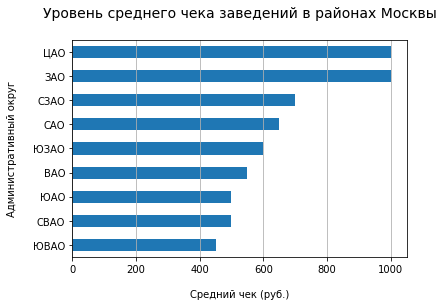

In [107]:
# Построим линейчатую диаграмму по административным округам Москвы 
plt.figure(figsize=(8, 8))
df_avg_price_group.sort_values(by='middle_avg_bill').plot(kind='barh',
                                                          x='district',
                                                          y='middle_avg_bill',
                                                          legend=False
                                                         )
plt.title('Уровень среднего чека заведений в районах Москвы\n', fontsize=14)
plt.xlabel('\nСредний чек (руб.)')
plt.ylabel('Административный округ\n')
plt.grid(axis='x')

plt.show()

***Самый высокий средний чек в Центральном и Западном округах и составляет 1000 рублей. Самые бюджетные заведения расположены в Юго-восточном (450 руб.), Северо-восточном (500 руб.), Южном (500 руб.) и Восточном (550 руб.) округах.***

## 4. Итоговый вывод и рекомендации

### 4.1. Общий обзор проделанной работы

В ходе исследования проанализировали данные 8406 заведений общественного питания города Москвы, которые собраны на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года, и включали информацию о заведениях, такую как: адрес, категория заведения, количество посадочных мест, график работы, оценка посетителей, уровень среднего чека, а также является ли заведение сетевым или нет.

При знакомстве с данными удалили 536 пропусков и 3 дублирующие строки. Провели нормализацию данных в столбцах с названиями заведений, адресом, административным округом и категорией заведения. Оптимизировали тип данных в столбцах `reiting` и `chain`.

### 4.2. Ответы на исследовательские вопросы

Исследовательский анализ данных позволил ответить главные вопросы, которые помогут инвесторам из фонда "Shut Up and Take My Money" принять взвешенные решения при открытии заведения общественного питания в Москве.

Исследуемые заведения общественного питания Москвы представлены в 8 категориях: кафе, рестораны, кофейни, бары(пабы), пиццерии, фастфуды, столовые и булочные. Большая часть заведений - кафе, рестораны и кофейни. Меньше всего столовых и булочных.

Лидером по количеству заведений общепита является Центральный административный округ. Среди районов за пределами садового кольца лидируют Северный, Северо-Восточный и Южный округа. Меньше всего заведений в Северо-Западном административном округе.  

Среди заведений Центрального округа большая часть - это рестораны, а также кафе и кофейни. Столовые и булочные тут не пользуются большим спросом - их меньше всего.   

Сетевые заведения занимают меньшую долю всех общепитов - 39%. Чаще всего сетевыми являются булочные, среди них 62% сетевых заведений. Кафе и пиццерии разделены примерно поровну (50% сетевых и 50% несетевых). Для баров (пабов) и столовых типичен несетевой формат.

Рестораны и бары являются заведениями, для которых типично большое количество посадочных мест, когда как пиццерии и булочные чаще работаю на доставку и на вынос, поэтому посадочных мест у ним меньше остальных.

Средний рейтинг всех исследуемых заведений составляет 4,24. При этом между категориями заведений он не сильно различается. Выше остальных оцениваются бары и пабы, а вот заведения быстрого питания оцениваются ниже.

Како-то сильной связи рейтинга заведений с другими параметрами не наблюдается. Заметна слабая корреляция с уровнем цен в заведениях - чем выше ценовая категория, тем выше оценка посетителей.

Лидером по количеству точек среди сетевых заведений Москве является «Шоколадница». За ней следуют «Домино'с Пицца» и «Додо Пицца». Большая часть крупных сетевых заведений - кофейни, рестораны и пиццерии.

Самые высокие цены в заведениях Центрального и Западного административных округов, а самые низкие цены в заведениях Юго-Восточного, Северо-Восточного и Южного округов. 

### 4.3. Рекомендации на основе анализа данных

**Выбор формата заведения**
Оптимальные формат заведения: кафе, ресторан или бар (паб). Они пользуются высоким спросом, особенно в центральных районах. Бары и рестораны имеют высокий средний рейтинг, что говорит о хорошем восприятии посетителями. Кафе и кофейни — наиболее массовый сегмент, но и конкуренция здесь выше. Сетевой формат имеет смысл для кофеен или пиццерий. Не рекомендуются рассматривать формат столовых и булочных из-за низкого спроса.

**Выбор локации**
Для премиального формата можно рассмотреть Центральный округ - максимальная проходимость, но высокая конкуренция и арендные ставки. Баланс спроса и конкуренции в Северном и Северо-Восточном округах. Для бюджетного варианта хорошо подойдет Юго-Восточный округ - низкие цены на аренду, но и низкий средний чек.

**Ценовая политика**
В Центральном, Западном и Северо-Западном округах можно ориентироваться на высокий ценовой сегмент, а в Юго-Восточном округе лучше ориентироваться на бюджетный сегмент. 

**Сетевой формат**
Рекомендуется начать как несетевое заведение для адаптации под локальный рынок и формирования репутации. После успешного запуска можно масштабироваться в сеть.